#  Summary Notebook

**This is a notebook that contains summaries of our entire project**

We will highlight our overall approach and our pipeline as well as give insight into some issues, limitations and assumptions we faced


## Overall Approach:
**The main stages of this industry project included:**
1. Acquisition of data including web scraping
2. Preprocessing data
3. Combining and transforming datasets
4. Modeling and hyperparameter tuning
5. Evaluation of performance
6. Statistical Analysis
7. Presenting Findings


## The 3 questions of interest:
1. What are the most important internal and external features in predicting rental prices?
2. What are the top 10 suburbs with the highest predicted growth rate?
3. What are the most liveable and affordable suburbs according to your chosen metrics?

We created liveability metrics, rental affordability index and growth rate metrics to compare the suburbs and provide meaningful insights to their clients i.e. renters looking for housing in Victoria.

## Affordability:
For affordability, our idea was to make our data approachable as possible. We think that our data on affordability would benefit the masses. Hence, we avoided using complicated indices  such as the Rental Affordability Index (RAI) that many of the public would not be familiar with. Hence, we decided to visualize the most affordable suburbs by comparing the median rent with the median household income of Victorians. We believe that affordability may vary according to different property types. 


## Liveability:
In terms of liveability, we believe that varying demographics would have different ideas of liveability. Hence,  we decided on two major demographics; families and young 20-ish. We adjusted our liveability index to what we think these two groups would prioritize by adjusting the weight of each variable within our liveability index. 


## Encountered Issues:

1.  When scraping data, as the RAM of our personal laptops are rather limited, we changed our code to separate the data into chunks. 

2. Malvern properties were unable to be scrapped as it resulted in an error 404; a server-side issue. Hence we skipped the scraping for Malvern

3. The postcodes dataframe resulted in Error 403 - Forbidden access.  Additional codes were written to bypass this layer of security. ‘

4. Scrape Notebook -  404 error produced when trying to scrape Malvern (postcode 3143). For this reason, Malvern ended up being skipped during the scraping. 

5. Scrape Notebook - Extremely inefficient and time consuming process (partly due to sleep timers) which delayed progress and limited the amount of data we were able to obtain.

6. Quarterly Rent Analysis Notebook 
The data contained merged suburbs where there would be multiple suburbs listed under one suburb name e.g. canterbury - surrey hills - mont albert for 3127. This made assigning postcodes to the data difficult and we had to choose which postcode to append to these listed suburbs. We decided based on personal opinion based on which suburb was more popular. Additionally postcodes for these suburbs had to be assigned manually.


## Limitations:
1.  Due to limitations of time, we were unable to explore more variables such crime rates, recreational facilities such as parks, gyms nearby or shopping malls, geographical properties such as pavement conditions or even the strength of local council policies of each suburb.

2. The free google maps API had limited requests per day/second. This caused a delay in our geolocation scaping and can be overcomed by using time delays in our code

3. The main metric used to summarize the cost of rent in a suburb and the approximate income of renters within a region was the median, which is unable to capture the spread of the data. This limited the power of our models.


4. Inability to access accurate historical rental data - this limited the power of our models and the predictions they made. 


5. Hardware limitations such as memory issues were also encountered during scraping, requiring us to split the scraping into smaller chunks that we had the memory to store. 



## Assumptions:
1. Available property listings from Domain.com and external datasets (e.g. ABS datasets) are representative of the entire market in Victoria, even if some areas or types of properties are underrepresented.
2. Rental prices and suburb growth over the next five years can be reasonably predicted based on the current market trends and the historical data available.
3. Factors influencing population growth, income distribution, and housing demand (e.g., demographics, economic trends) will remain consistent, or evolve predictably, over the forecast period.
4. External factors such as proximity to schools, parks, and public transportation are consistent predictors of rental prices and remain stable over the predicted time frame.
5. When considering affordability of each suburb, we assumed that the median household income data from 2022 was still even applicable for 2024 rental prices. This is because we had a lack of data online concerning the 2024 median household income. 

## Recommendations:
For young 20-ish, we think that rental affordability would be an utmost priority (weighted at 40%). This is followed by grocery convenience (20% weightage) as we think that most 20-ish might not have access to a car either due to a lack of funds or being an international student - commitment to a car might not be worth it if they frequently return home. Proximity to the city (20% weightage) was weighed slightly higher as well as we believe that young adults would prefer to live near the city for convenience, nightlife or work opportunities. 

On the other hand, for families, 3 or more bedrooms would be more ideal as it would provide more living space for children or furry friends to roam in. Grocery convenience (weighted at 20%) would be equally as important for families as for 20-ish. Education access (20% weightage) would be higher than that of 20-ishadults for the education of their young children. 


# Individual Notebook Summaries:

## Scrape Notebook


The scrape notebook is in charge of obtaining property data by web scraping from Domain.com and storing them in parquet files.

From each property listed, we found:
- url
- postcode
- suburb
- name
- string containing the cost 
- number of bedrooms
- number of bathrooms
- number of parking
- property type

Output:
- A dataframe of individual rental property listings obtained from Domain.com which contained the features listed above.
<br><br>

---


## Postcode_import notebook:
This notebook aims to download information from Matthew Proctors Australian postcodes dataset and convert it into a useful dataframe by processing it to contain only information we want.
<br><br>
Input:
- Download the dataset as postcodes.csv
<br>

Output:
Convert the dataset to postcodes.parquet which contain features:
- Postcode
- Locality
- Longitude
- Latitude
<br><br>

---


## Properties notebook:

The properties notebook takes the landing data obtained on Domain.com (i.e. the properties data) as well as the data from the ABS (regional population data) and goes through pre-processing steps. The aim of this notebook is to transform the landing data into a useable form and create a merged dataframe that combines all the features of interest from the individual properties, and regional population data. The final dataframe is indexed by the postcode.

The features of interest in the final dataframe include:
- Postcode
- Cost of the property (float)
- Suburb the property is located in (string)
- Furnishing - boolean value indicating whether the property comes with furnishing (partially or fully)
- Property type i.e. House, Flat, Apartment (string)
- Number of bedrooms (float)
- Number of bathrooms (float)
- Parking availability (int)
- Region # how is this different to lgaregion (string)
- Lgaregion # what does this mean (string)
- Total population in 2021 (int)
- Total male population in 2021 (int)
- Total female population in 2021 (int)
- Number of Australian citizens (int)
- Median rent of a suburb (int)
- Median weekly income of a household (int)
- Median age of renters (int)
- Total male population of a region in 2022 # I think we delete this later (float)
- Total female population of a region in 2022 # I think we delete this later (float)

**Properties notebook - Final Output (first instance, first few features):**


![Test](https://i.imgur.com/QdLOmx7.png)

<br><br>

---

## Liveability_variables notebook:
<br>
This notebook aims to retrieve all the necessary information for analyzing the liveability index. First, we scrape data on grocery stores, healthcare services, and schools in each suburb of Victoria using the Google Maps API. After gathering the data, we count the number of schools, grocery stores, and healthcare facilities in each suburb merged into a single dataframe. 
<br><br>
Next, we calculate the distance from each suburb to Melbourne CBD by retrieving the geolocation of every suburb and applying the Haversine formula. This formula helps us determine the greatest distance between two points on a sphere (as the Earth is round) using longitude and latitude. This was also merged into a single dataframe along with the count of the number of schools, grocery stores and healthcare facilities of each suburb To ensure the reliability of the ‘distance to CBD’ variable, we exclude distances less than 1 km. In this case, Melbourne CBD (Postcode 3000) is our pivot.

Finally, we combine the current variables with the ‘merged_df”  parquet file, which contains cleaned data (postcode, cost, number of bedrooms, bathrooms, parking available, furnished detail, property type, population data, median rent, and family weekly income) from another notebook and produce a new parquet file, ‘liveability_data’.
<br><br>

---

## Quarterly_rent_analysis notebook:
Within this notebook, quarterly rent data was preprocessed and time series plots for moving quarterly rents and number of rental properties available were generated. Using the quarterly rent data, the Rent Affordability Index (RAI) and 20 year growth rate across suburbs were calculated accordingly. <br>
RAI - median rent 
<br>
20 year growth rate = (MedianRentMarch2024 - MedianRentMarch2000) / MedianRentMarch2024
<br>

Input:
- A data frame containing quarterly information regarding the median rent as well as the number of available rental properties. 
- The median household income of Victorians was also obtained
<br>

Output: 
- Time Series plots to visualize the moving quarterly median rents and number of available rental properties across Victoria
- Two separate data frames containing the Rent Affordability index and 20 year growth rates.  
<br><br>

---

## Liveability_index notebook:
This notebook aims to model the liveability of suburbs based on the liveability metrics calculated in previous notebooks. We then weigh the metrics based on the number of bedrooms which reflect certain demographics. 1-2 bedrooms aimed at an average 20s yr old and 3+ bedrooms aimed at families. Then we also created a dataframe of the affordability of different suburbs based on the same property types for demographics and combined the two dataframes together.

Input:

Dataframe containing liveability metrics such as : 
- proximity to the cbd
- schools per capita
- healthcare per capita 
- groceries per capita 
- all_RAI
- 1-2_Bed_RAI
- 3+_Bed_RAI

Output:
- Dataframe containing liveability scores and affordability for each suburb and target demographic. The affordability was visualized such that it showed the  percentage of median household income the rent was.
<br><br>

---


## Preprocessing_suburb_level notebook:
This notebook combines the previous dataframes (property, liveability, rent affordability) created and combines them into a single dataframe, cleans up formatting and removes unnecessary data at a suburban level. The aim of this notebook is to centralise our data in order for reuse in other tasks.

Input:
RAI.parquet containing Rent Affordability Index of  
- 1 Bedroom flats
- 2 Bedroom flats
- 3 Bedroom flats
- 2 Bedroom houses
- 3 Bedroom houses
- 4 Bedroom houses
- All property types

Combined_data_with_geolocation containing: 
- Number of Schools
- Number of Groceries 
- Number of Healthcare Centers
- Latitude of Suburb
- Longitude of Suburb
- Suburb name

Liveability_data containing useful columns:
- Postcode
- Suburb
- Property types
- Number of beds
- Total population 2021
- Number of schools, groceries, healthcare
- Latitude and Longitude
- Distance to the CBD
- Schools per Capita

Output:
A singular merged dataframe, suburb_level_data containing: 
- Postcode
- Suburb
- Property type
- Total population 2021
- Number of schools, groceries, healthcare
- Latitude, Longitude 
- Distance to  the CBD 


<br><br>

---


## Geolocation notebook:
This notebook works on fetching the required maps data by using google maps API. The property file that was scraped from domain.com.au is now used here to fetch each property's longitude and latitude by passing each address through user defined functions.  This has to be done in batches of 1000 because when all properties are passed together, the google maps API crashes as the limit exceeds. 


After all coordinates are found, distance to CBD and closest school was calculated for all properties.


Input: 
- Dataframe containing distance to closest school and distance to the cbd for each property

Output:
- Dataframe that contains the average distance to the closest school and the average distance to the cbd for all properties in a postcode.

<br><br>

---


## Visualise_maps notebook:
The property_coords file from geolocation, and property file from scrape had been merged here to create map features. The map_features file was then tweaked and edited to make further graphs for properties across Victoria, and also for three key suburbs of interest. The property data combined with geolocation was used to provide essential services in maps with respect to their suburbs.

Input:
- Dataframe map_features, which includes properties and all its features.
- Dataframe combined_data_with_geolocation used for essential services (schools, groceries & healthcare)

Output:



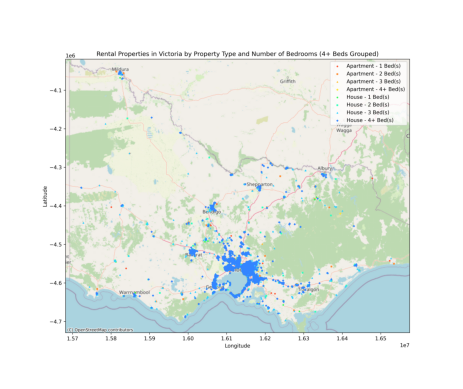

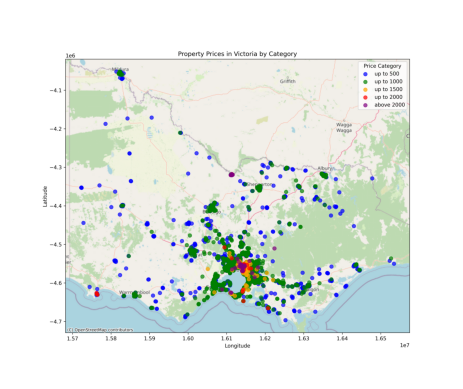

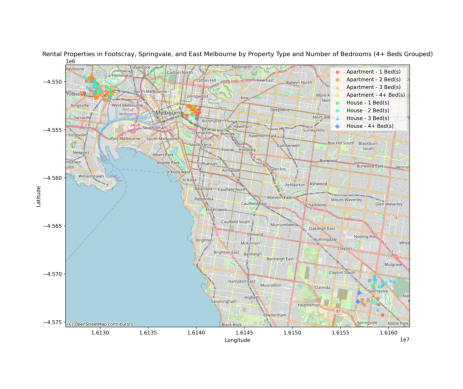

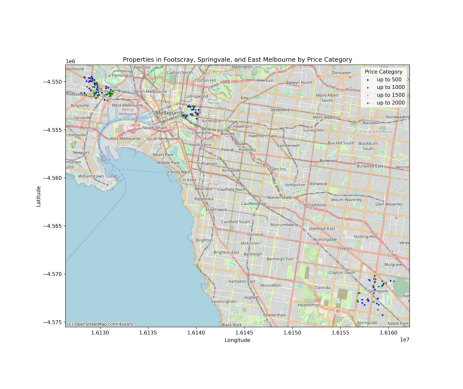

In [3]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the folder path where the images are stored
folder_path = '../plots/'

# List of the 4 specific image files
selected_images = [
    'property_type.png',
    'property_prices_by_category.png',
    'rental_types_selected_suburbs.png',
    'prices_footscray_springvale_eastmelb.png'
]

# Loop through the selected images and display each one
for image_file in selected_images:
    image_path = os.path.join(folder_path, image_file)
    
    # Load and display the image
    img = mpimg.imread(image_path)
    plt.figure()  # Create a new figure for each image
    plt.imshow(img)
    plt.axis('off')  # Hide the axis
    plt.show()


<br><br>

---

## Findings
Question 1: 
- XGB Regressor model output the most important features in predicting the rental price

![graph 2](https://i.imgur.com/f1PLDHZ.png)


Question 2: 
- Based on the Growth Rate metrics outlined in the beginning of this summary notebook, the top 10 suburbs with the highest predicted growth rate are as follows:<br>
![Test](https://i.imgur.com/f1PLDHZ.png)



Based on this graph, we recommend the suburbs shown above as ideal locations for investment opportunities, since the value of properties in these areas is likely to increase in the near future. Springvale is most highly recommended since it is within an hour from the CBD and is less developed than inner city suburbs, so thereby has more potential for growth and financial gain.

Question 3: 
Overall Liveability Scores:

![Test](https://i.imgur.com/CyYIcnB.png)


Liveability scores based on the number of bedrooms:<br>
![Test](https://i.imgur.com/r9vqfxH.png)
<br>
![Test](https://i.imgur.com/Cp1mBTN.png)